In [1]:
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import numpy as np
from ipywidgets import interact, interactive, fixed, interact_manual
sns.set()
sns.set_style("darkgrid")


In [2]:
dataset = pd.read_csv("cars.csv")

In [95]:
dataset.columns

# Rename columns
dataset.columns = ['model', 'MPG', 'cylinders', 'horsepower', 'weight', 'year', 'origin']

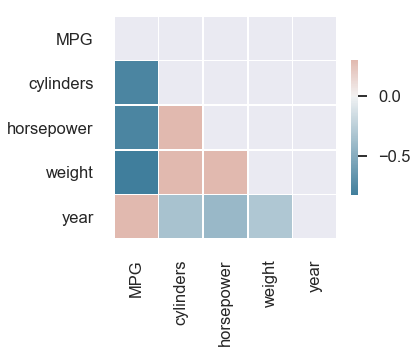

In [96]:
columns = ['MPG', 'cylinders', 'horsepower', 'weight', 'year']
d = dataset[columns]

# Compute the correlation matrix
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(5, 5))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


In [98]:
sns.set_style("darkgrid")

dataset = dataset.sort_values("origin")

miny, maxy = min(dataset.MPG), max(dataset.MPG)
minx, maxx = min(dataset.horsepower), max(dataset.horsepower)

# Create variables so that filtering will go faster
for i in range(1970, 1983):
    globals()['data%s' % i] = dataset[dataset.year == i - 1900]

In [68]:
%%capture
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("whitegrid")
plt.ioff()
fig, ax = plt.subplots(figsize=(10,10), sharex=True);
plt.ioff()

In [103]:
import matplotlib
matplotlib.rcParams['font.family'] = "serif"
sns.set_style("darkgrid")
sns.set_context('talk')


def series(Year):

    plt.ioff()
    fig, ax = plt.subplots(figsize=(10,10), sharex=True);
    name = f'data{Year}'
    data = globals()[name]
    
    relplot1 = sns.scatterplot(data=dataset, 
                          x="horsepower", 
                          y="MPG", 
                          hue="cylinders", 
                          size="weight", 
                          style="origin",
                          sizes=(25, 250), 
                          palette="crest", 
                          legend = False,
                          alpha=0.08, ax = ax)
    relplot1.set(xlim=(minx - 5, maxx + 5))
    relplot1.set(ylim=(miny - 3, maxy + 3))
    relplot1.tick_params(labelsize=15)
    relplot1.set_xlabel("MPG", fontsize=15)
    relplot1.set_ylabel("Horsepower", fontsize=15)
    plt.close()
    
    relplot = sns.scatterplot(data=data, 
                          x="horsepower", 
                          y="MPG", 
                          hue="cylinders", 
                          size="weight", 
                          style="origin",
                          sizes=(30, 350), 
                          palette="crest", 
                          alpha=1, ax = ax)
    
    relplot.set(xlim=(minx - 5, maxx + 5))
    relplot.set(ylim=(miny - 3, maxy + 3))
    relplot.legend(loc='center right', bbox_to_anchor=(1.25, 0.5), ncol=1)
#     ax.get_legend().remove()
    plt.close()
    display(relplot.figure)
    plt.close()
    return

interact(series, Year=(1970,1982,)); 




interactive(children=(IntSlider(value=1976, description='Year', max=1982, min=1970), Output()), _dom_classes=(…

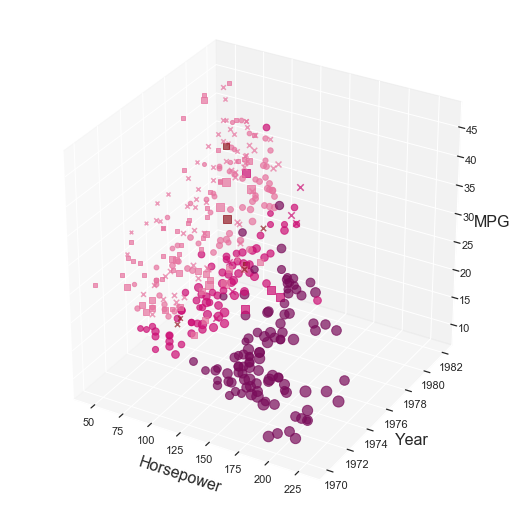

In [117]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm
import seaborn as sns
sns.set()

cylinders = dataset['cylinders']
colors = [0, 0, 0, '#931a25', '#e6739f', '#931a25', '#cc0e74', 0, '#790c5a']
colorlist = [colors[i] for i in cylinders]

marker = {
    'US': 'o',
    'Japan': 'x',
    'Europe': 's'
}

years = {
    70: '1970',
    71: '1971',
    72: '1972',
    73: '1973',
    74: '1974',
    75: '1975',
    76: '1976',
    77: '1977',
    78: '1978',
    79: '1979',
    80: '1980',
    81: '1981',
    82: '1982',
    83: '1983'
}


markers = [marker[i] for i in dataset['origin']]

fig = plt.figure(figsize=(7,7))

ax = Axes3D(fig)

x = dataset["horsepower"]
y = dataset["MPG"]
z = dataset["year"]
size = dataset["weight"]
size = [(n**2)/10e5*5 for n in size]
z = [int(years[i]) for i in z]

ax.set_xlabel('Horsepower', fontsize=16)
ax.set_zlabel('MPG', fontsize=16)
ax.set_ylabel('Year', fontsize=16)
ax.set_facecolor('white')
    
for xp, yp, zp, m, color, s in zip(x, y, z, markers, colorlist, size):
    ax.scatter([xp],[zp], [yp], marker=m, color=color, alpha=0.7, s=s)
ax.tick_params(axis='x', which='major', pad=0)
ax.tick_params(axis='y', which='major', pad=0)
ax.tick_params(axis='z', which='major', pad=0)
plt.show()

In [119]:
minx, maxx

(46, 230)

In [120]:
dataset

,model,MPG,cylinders,horsepower,weight,year,origin
195,vw rabbit,29.0,4,70,1937,76,Europe
205,volvo 245,20.0,4,102,3150,76,Europe
184,renault 12tl,27.0,4,83,2202,76,Europe
181,opel 1900,25.0,4,81,2220,76,Europe
180,fiat 131,28.0,4,86,2464,76,Europe
...,...,...,...,...,...,...,...
73,ford gran torino (sw),13.0,8,140,4294,72,US
382,chrysler lebaron medallion,26.0,4,92,2585,82,US
359,oldsmobile cutlass ls,26.6,8,105,3725,81,US
72,chevrolet chevelle concours (sw),13.0,8,130,4098,72,US


In [122]:
np.linspace(2000, 4500, 9)

array([2000. , 2312.5, 2625. , 2937.5, 3250. , 3562.5, 3875. , 4187.5,
       4500. ])